## Desafío - Regresión desde la econometría

* Para poder realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Contexto

Nombre: Juan Oyarce G.

En este desafío trabajaremos con un registro de clientes de un banco e información sobre su salud
financiera. La base contenida en el csv Credit contiene las siguientes variables:

* Income : Ingreso anual disponible en miles de dólares.
* Limit : Límite del crédito.
* Rating : Ranking del crédito.
* Cards : Cantidad de tarjetas de credito.
* Age : Edad del usuario.
* Education : Años de educación del usuario.
* Gender : ¿Hombre o mujer?
* Student : ¿Es estudiante?
* Married : ¿Está casado?
* Ethnicity : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
* Balance : Promedio de deuda en tarjeta de crédito de usuario.

Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el
promedio de deuda en tarjeta de crédito.

A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de
distintos atributos


### Desafío 1: Prepare el ambiente de trabajo

* Importe las librerías básicas para el análisis de datos.
* Incluya los import base de statsmodels .
* Importe la base de datos Credit.csv y elimine la columna Unnamed: 0 .
* Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias para AfricanAmerican y Asian.
    * tip: Utilice value_counts() para revisar la cantidad de casos en las variables categóricas.

In [3]:
# importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

In [13]:
df = pd.read_csv('Credit.csv').drop('Unnamed: 0', axis=1) #eliminamos la primera columna del dataset
df.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


* Conteo con value counts

In [14]:
df['Ethnicity'].value_counts('%')

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64

In [6]:
df['Gender'].value_counts('%')

Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

In [7]:
df['Student'].value_counts('%')

No     0.9
Yes    0.1
Name: Student, dtype: float64

In [8]:
df['Married'].value_counts('%')

Yes    0.6125
No     0.3875
Name: Married, dtype: float64

 
Binarizamos las variables con el método where de Numpy; también se puede hacer mediante Pandas get_dummmies o con una f(x) map  
Gender_dummies=pd.get_dummies(df.Gender,prefix='Gender', drop_first= True) # generación de variables dummies
df=pd.concat([df,Gender_dummies], axis=1) # las agregamos al Dataset
df.drop('Gender', axis=1, inplace=True) # Eliminamos la columna original
df['Gender']=df.Gender.map({'Male':0,'Female':1}) # uso de Map
 

In [15]:


df['Asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)
df['African_American'] = np.where(df['Ethnicity'] == 'African American', 1, 0)
df['Student'] = np.where(df['Student'] == 'Yes', 1, 0)
df['Single'] = np.where(df['Married'] == 'No', 1, 0)
df['Male'] = np.where(df['Gender'] == ' Male', 1, 0)

In [16]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,African_American,Single,Male
0,14.891,3606,283,2,34,11,Male,0,Yes,Caucasian,333,0,0,0,1
1,106.025,6645,483,3,82,15,Female,1,Yes,Asian,903,1,0,0,0
2,104.593,7075,514,4,71,11,Male,0,No,Asian,580,1,0,1,1
3,148.924,9504,681,3,36,11,Female,0,No,Asian,964,1,0,1,0
4,55.882,4897,357,2,68,16,Male,0,Yes,Caucasian,331,0,0,0,1


### Desafío 2: Genere gráficos descriptivos para las variables contínuas

* Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
* ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [23]:
def plot_hist(dataframe, variable):
    """
    Definición: Esta función genera un histograma y grafica la media y mediana
    Input: dataframe: recibe un dataframe, y la variable, es la variable numérica a representar
    Outpout: genera un histograma
    
    """
    plt.hist(dataframe[variable], alpha=1, color='gray', label=variable)
    plt.axvline(dataframe[variable].mean(), lw=3, color='tomato', label='Media')
    plt.axvline(dataframe[variable].median(), lw=3, color='green', label='Mediana')
    plt.title('Histograma')
    plt.legend()
    plt.show()

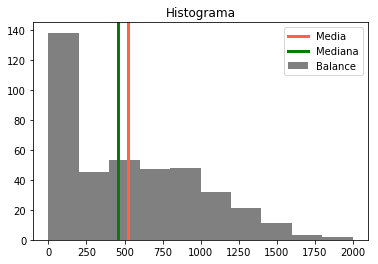

In [22]:
plot_hist(df, 'Balance')

* El comportamiento de la variable Balance está desbalanceada hacia los valores iniciales, luego la distribución va decayendo, las medias y las medianas  se concentran en torno al primer cuartil de la distribución 

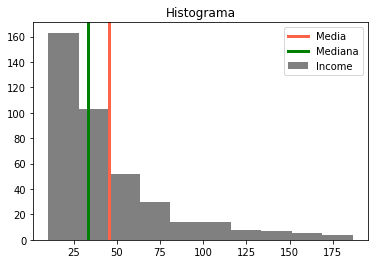

In [24]:
plot_hist(df, 'Income')

* El comportamiento de la variable Income está desbalanceada hacia los valores iniciales, luego la distribución va decayendo muy abruptamente tras la media, las medias y las medianas  se concentran en torno al primer cuartil de la distribución 

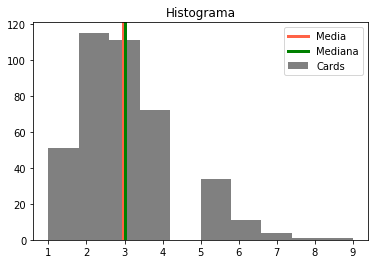

In [25]:
plot_hist(df, 'Cards')

* El comportamiento de la variable Cards está desbalanceada hacia los valores iniciales y segmentada en dos grupos , luego la distribución va decayendo muy abruptamente tras la media y se interrumpe, las medias y las medianas  se concentran en torno al primer tercio de la distribución 

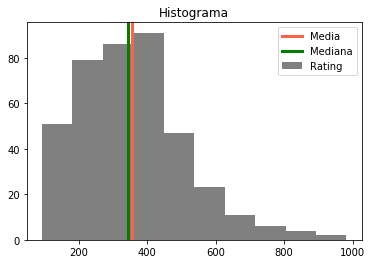

In [26]:
plot_hist(df, 'Rating')

* El comportamiento de la variable Rating está desbalanceada hacia los valores iniciales, luego la distribución va decayendo muy abruptamente tras la media, las medias y las medianas  se concentran en torno al segundo quintil de la distribución 

### Desafío 3: Regresión Lineal Simple

* A continuación generaremos una serie de modelos simples:


$${Balance}={{\beta }_{0} + {\beta }_{1} \cdot {Student} +{\epsilon}_{i}}$$

$${Balance}={{\beta }_{0} + {\beta }_{1} \cdot {Income} +{\epsilon}_{i}}$$

$${Balance}={{\beta }_{0} + {\beta }_{1} \cdot {Rating} +{\epsilon}_{i}}$$



* Utilizando statsmodels , comente brevemente los siguientes puntos:
    * ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
    * ¿Qué podemos decir sobre el comportamiento de Student ?
        * ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?



In [28]:
modelo_Balance_Student = smf.ols('Balance ~ Student', df).fit() # generación del modelo regresión líneal simple
modelo_Balance_Student.summary() # sumario del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.49e-07
Time:                        00:07:29   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
Student      396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretación general del modelo


* Sobre los estadísticos del modelo se puede afirmar que la regresión emplea el método de mínimos cuadrados ordinarios para estimar los parámetros del modelo, la probabilidad f que es inferior a 0.05 (1.49e-07) nos sugiere que el modelo es estadísticamente significativo con un 95 % de confianza, los valores de r cuadrado  y r cuadrado ajustado (minimiza los efectos de colinealidad entre múltiples variables de un modelo de regresión líneal) son cercanos a 0.065 nos indican una correlación practicamente nula entre las variables.  

* El intercepto y la variable independiente de estudiante, son estadísticamente significativas p valor>0.05, pero se encuentran no correlacionadas, los coeficientes de ambas variables muestran una tendencia positiva, pero no resultan ser explicativas debido al valor bajisimo del r cuadrado ajustado (Adj. R-squared:	0.065), cercano a 0.

* Los otros valores dan información acerca del comportamiento de los residuos del modelo, podemos observar por los valores de kurtosis 2.6 se apróximan a una distribución normal, los valores de Durbin-Watson cercanos a 2 sugiere que no hay autocorrelación entre los residuos del modelo.

In [27]:
modelo_Balance_Income = smf.ols('Balance ~ Income', df).fit()
modelo_Balance_Income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 22 Jul 2019   Prob (F-statistic):           1.03e-22
Time:                        00:07:25   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
modelo_Balance_Rating = smf.ols('Balance ~ Rating', df).fit()
modelo_Balance_Rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          1.90e-120
Time:                        00:07:57   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?


-La variable Rating presenta la mejor correlación positiva con r cuadrado ajustado de 0.75, por lo que demuestra que a medida que aumentan los valores de Rating aumentan los valores de Balance


* ¿Qué podemos decir sobre el comportamiento de Student ?


-La variable Student presenta la peor correlación   con r cuadrado ajustado de 0.06, lo que sugiere que no hay correlación con balance






* ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?


In [31]:
med_cont = df.query('Student == 1')['Balance'].mean()
med_rw = df.query('Student == 0')['Balance'].mean()
print("La Media de Estudiantes es:", med_cont) 
print("La Media de no estudiantes:", med_rw)
dif_med = med_cont - med_rw
print("La diferencia de Medias entre Estudiantes y No Estudiantes es:", dif_med)

La Media de Estudiantes es: 876.825
La Media de no estudiantes: 480.36944444444447
La diferencia de Medias entre Estudiantes y No Estudiantes es: 396.4555555555556


In [32]:
prueba_hipotesis = stats.ttest_ind(df.query('Student == 1')['Balance'].dropna(),     # prueba de hipotesis
                df.query('Student == 0')['Balance'].dropna())
prueba_hipotesis

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

* La prueba de hipótesis con un valor muy inferior a 0.05 nos indica que existe una diferencia de medias para los valores de Balance entre los grupos de estudiante y no-estudiante

### Desafío 4: Genere un modelo que incluya todos los regresores

* Comente brevemente sobre el poder explicativo en la varianza de Y las principales características de los predictores.


In [40]:
variables= list(df.columns) #lista con todas las variables
variables.remove('Balance') # Para evitar un error de autocorrelación removemos la variable dependiente de la lista
var=' + '.join(variables)
modelo_general = smf.ols('Balance ~ '+ var, df).fit()
modelo_general.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          1.11e-253
Time:                        00:40:19   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -200.5824     14.106    -14.220      0.000    -228.315    -172.850
Gender[T.Female]        -105.6178      8.612    -12.264      0.000    -122.550     -88.686
Married[T.Yes]          -104.5582      8.828    -11.843      0.000    -121.916     -87.201
Ethnicity[T.Asian]       -35.4162      5.266     -6.725      0.000     -45.770     -25.062
Ethnicity[T.Caucasian]   -77.5296      8.063     -9.615      0.000     -93.383     -61.676
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
Student                  425.7474     16.723     25.459      0.000     392.869     458.626
Asian                    -35.4162      5.266     -6.725      0.000     -45.770     -25.062
African_American         -87.6366      9.381     -9.342      0.000    -106.080     -69.194
Single                   -96.0243      8.674    -11.070      0.000    -113.078     -78.971
Male                     -94.9646      8.629    -11.005      0.000    -111.930     -77.999
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.09e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [42]:
variables= list(df.columns)
variables

['Income',
 'Limit',
 'Rating',
 'Cards',
 'Age',
 'Education',
 'Gender',
 'Student',
 'Married',
 'Ethnicity',
 'Balance',
 'Asian',
 'African_American',
 'Single',
 'Male']

* Este modelo explica un 95 % de la varianza, lo que lo hace que tenga una gran fuerza predictiva (Adj. R-squared:	0.954), el r cuadrado ajustado, disminuye los efectos aditivos de añadir y combinar linealmente muchas variables al modelo, el f de probabilidad indica que el modelo es significativo estadísticamente al ser muy inferior al p-valor 0.05(2 colas). Los regresores en su mayoría salvo Education, son estadísticamente significativos y tienen diferentes tendencias de asociación, positivas y negativas

### Desafío 5: Depure el modelo e incluya sólo los predictores significativo

* En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-value <= 0.025. Comente brevemente sobre el poder explicativo en la varianza de Y las principales características de los predictores.
* ¿Mejoró o empeoró el modelo con la reducción de regresores?


In [35]:
pvalues = modelo_general.pvalues
print ('Las siguientes variables son estadísticamente significativas: ')        
means_values= pd.Series(pvalues).where(lambda x : x<0.025).dropna() 
print(means_values)

df.columns





Las siguientes variables son estadísticamente significativas: 
Intercept                  3.129771e-37
Gender[T.Female]           1.901128e-29
Married[T.Yes]             7.802116e-28
Ethnicity[T.Asian]         6.303277e-11
Ethnicity[T.Caucasian]     8.997201e-20
Income                    7.372312e-116
Limit                      1.205974e-08
Rating                     2.112213e-02
Cards                      5.401200e-05
Student                    8.854521e-85
Asian                      6.303277e-11
African_American           7.507437e-19
Single                     6.118766e-25
Male                       1.063622e-24
dtype: float64


In [45]:
# generamos un modelo con variables estadísticamente significativas

variables= list(df.columns)
variables.remove('Balance')  
variables.remove('Age')  
variables.remove('Education')  
var_2=' + '.join(variables)





In [46]:
modelo_general_depurado = smf.ols('Balance~ '+ var_2, df).fit()
modelo_general_depurado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     909.8
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          1.39e-255
Time:                        00:47:37   Log-Likelihood:                -2401.2
No. Observations:                 400   AIC:                             4822.
Df Residuals:                     390   BIC:                             4862.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -220.5780      8.301    -26.572      0.000    -236.899    -204.257
Gender[T.Female]        -115.7194      6.476    -17.870      0.000    -128.451    -102.988
Married[T.Yes]          -113.9601      6.687    -17.042      0.000    -127.107    -100.813
Ethnicity[T.Asian]       -38.9046      4.805     -8.096      0.000     -48.352     -29.457
Ethnicity[T.Caucasian]   -85.2427      6.805    -12.526      0.000     -98.622     -71.863
Income                    -7.8797      0.232    -33.973      0.000      -8.336      -7.424
Limit                      0.1902      0.033      5.798      0.000       0.126       0.255
Rating                     1.1550      0.491      2.351      0.019       0.189       2.121
Cards                     17.3904      4.354      3.994      0.000       8.830      25.951
Student                  426.2112     16.715     25.499      0.000     393.349     459.074
Asian                    -38.9046      4.805     -8.096      0.000     -48.352     -29.457
African_American         -96.4307      8.037    -11.998      0.000    -112.233     -80.629
Single                  -106.6179      6.580    -16.204      0.000    -119.554     -93.682
Male                    -104.8586      6.482    -16.177      0.000    -117.602     -92.115
==============================================================================
Omnibus:                       31.777   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.281
Skew:                           0.739   Prob(JB):                     8.03e-09
Kurtosis:                       3.224   Cond. No.                     8.07e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.71e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

* Al depurar el modelo con variables estadísticamente significativas, los cambios son infimos en el R cuadrado ajustado, pero se puede probar otra estrategia, que es inspeccionar las correlaciones parciales para la variable Balance y eliminar aquellas variables que tenga un valor de correlación inferior a 0.4 para simplifica el modelo

In [67]:
df.corr()['Balance']

Income              0.463656
Limit               0.861697
Rating              0.863625
Cards               0.086456
Age                 0.001835
Education          -0.008062
Student             0.259018
Balance             1.000000
Asian              -0.009812
African_American    0.013720
Single              0.005673
Male               -0.021474
Name: Balance, dtype: float64

In [68]:
df.corr()['Balance']>0.4

Income               True
Limit                True
Rating               True
Cards               False
Age                 False
Education           False
Student             False
Balance              True
Asian               False
African_American    False
Single              False
Male                False
Name: Balance, dtype: bool

 - Podemos apreciar que las variables Income, Limit y Rating son explicativas con un r mayor a 0.4, con éstas variables probaremos un nuevo modelo

In [71]:
modelo_general_depurado2 = smf.ols('Balance~ Income + Limit + Rating', df).fit()
modelo_general_depurado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     934.6
Date:                Mon, 22 Jul 2019   Prob (F-statistic):          3.20e-179
Time:                        01:03:15   Log-Likelihood:                -2601.5
No. Observations:                 400   AIC:                             5211.
Df Residuals:                     396   BIC:                             5227.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -489.7275     32.099    -15.257      0.000    -552.833    -426.622
Income        -7.7193      0.378    -20.418      0.000      -8.463      -6.976
Limit          0.0847      0.045      1.894      0.059      -0.003       0.173
Rating         2.6986      0.666      4.052      0.000       1.389       4.008
==============================================================================
Omnibus:                       95.253   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.312
Skew:                           1.373   Prob(JB):                     2.83e-37
Kurtosis:                       4.601   Cond. No.                     2.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Al depurar el modelo con variables estadísticamente significativas y explicativas de la varianza sobre un r de 0.4, se obtiene un modelo con un r cuadrado ajustado de 0.875, cercano a 0.88, que es muy bueno estadísticamente, si bien es inferior a al modelo anterior, es mucho más sencillo trabajar con tres variables independientes que con  13 variables, cuya explicación de la varianza es superior al 80 %

### Desafío 6:

* Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

- Los 3 principales regresores son Income, Limit y Rating 

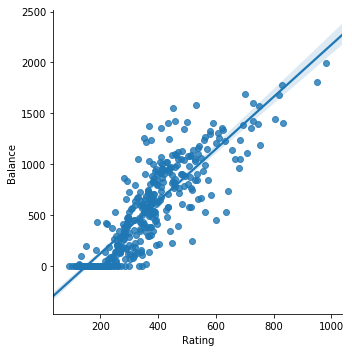

In [61]:
sns.lmplot('Rating', 'Balance', df)

- Se aprecia una correlación líneal positiva bastante marcada entre Balance y Rating, la varianza no es tan grande, y no se observan demasiados casos atípicos (outliers)

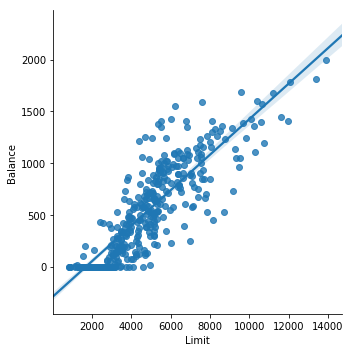

In [72]:
sns.lmplot('Limit', 'Balance', df)

- Se aprecia una correlación líneal positiva bastante marcada entre Balance y Limit, la varianza no es tan grande, y no se observan demasiados casos atípicos (outliers)

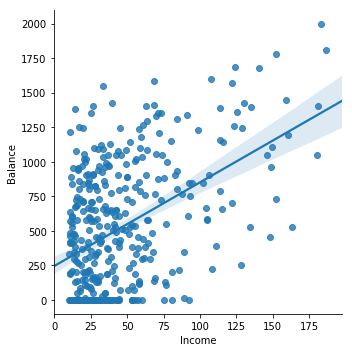

In [67]:
sns.lmplot('Income', 'Balance', df)

- Se aprecia una regresión líneal parcial y aparente entre Balance e Income, la varianza  es grande, y  se observan varios casos atípicos (outliers), esto concuerda con los valores de r cercanos a 0,46, talvez una función exponencial o logarítmica se ajusten mejor a los datos